In [1]:
"""
Name: analysis.ipynb
Authors: Stephan Meighen-Berger
Example analysis
"""

'\nName: analysis.ipynb\nAuthors: Stephan Meighen-Berger\nExample analysis\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
import pandas as pd

In [3]:
# picture path
PICS = '../pics/'

In [4]:
data_count = 7
binned_data = []
times = []
frequencies = []
fft_trafo = []
for i in range(data_count):
    # Loading data
    data = np.load('../data/storage/thirty_cycles_%s.npy' % str(i))
    org_times = np.load('../data/storage/thirty_cycles_time_%s.npy' % str(i))
    # Processing
    # Adding 0 at the beginning and end
    tmp_data = np.insert(data, [0, -1], [0., 0.])
    step = np.diff(org_times)[0]
    tmp_times = np.insert(org_times, [-2, -1], [org_times[-1] + step, org_times[-1] + 2 * step])
    # Processed
    binned_data.append(tmp_data)
    times.append(tmp_times)
    # FFT
    frequencies.append(np.fft.fftfreq(binned_data[-1].size, d=np.diff(times[-1])[0]))
    fft_trafo.append(np.abs(np.fft.fft(np.sqrt(binned_data[-1])))**2.)

In [67]:
smoothing_window = 201

In [68]:
# Average smoothed
average_smoothed = np.nan_to_num((np.sum(np.array([pd.Series(binned_data[i]).rolling(window=smoothing_window).mean()
                                  for i in range(data_count)]), axis=0) / data_count))
average = np.nan_to_num((np.sum(binned_data, axis=0) / data_count))
average_fft = np.abs(np.fft.fft(np.sqrt(average_smoothed)))**2.

In [69]:
# Plotting standards
std_size = 20.
fontsize = 30.
lw=3.
h_length=1.5

In [79]:
times[0][2000]

120000

In [78]:
np.argmax(average_smoothed[:1000])

621

In [80]:
np.argmax(average_smoothed[1000:2000])

426

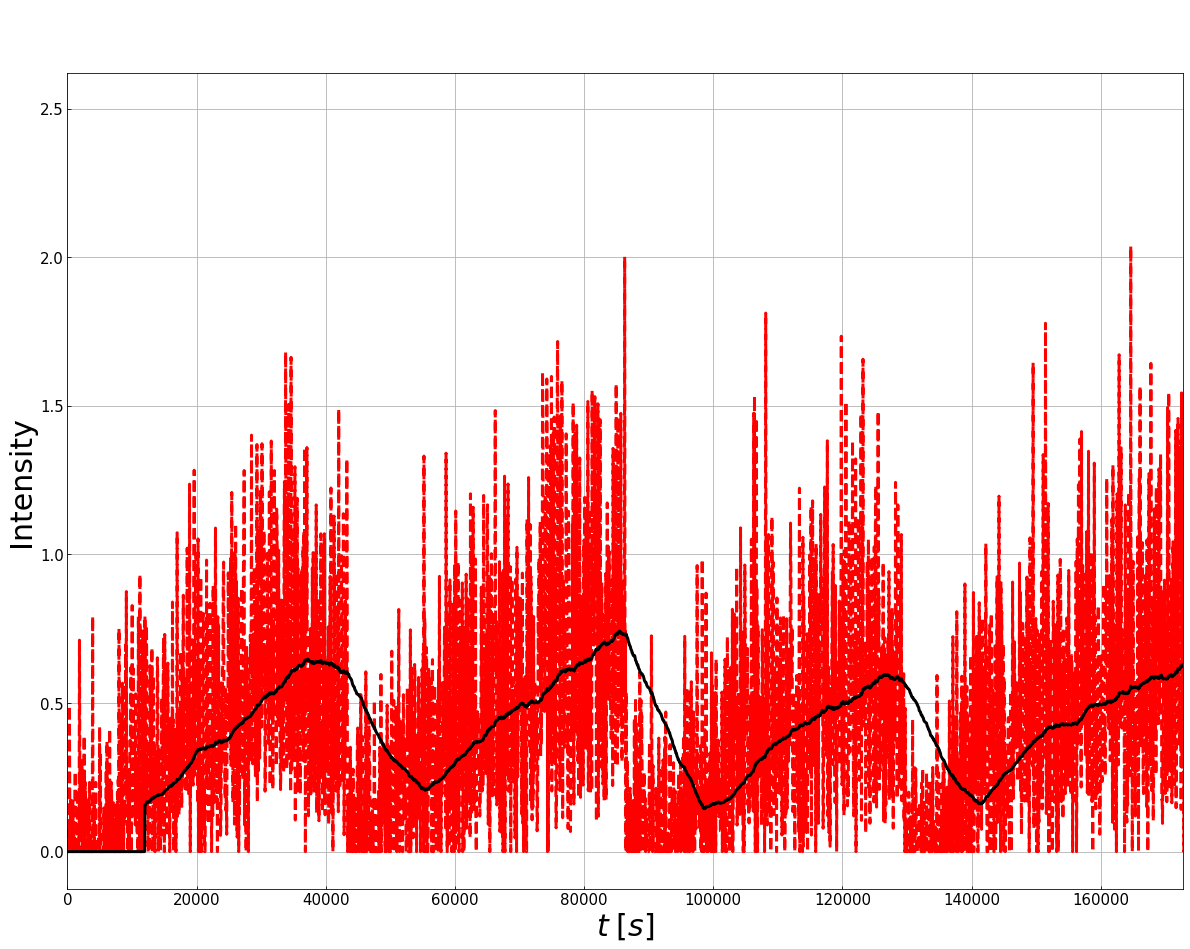

In [74]:
# Time distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(
    times[0],
    average,
    lw=lw, color='r', ls='--'
)
ax1.plot(
    times[0],
    average_smoothed,
    lw=lw, color='k',
)
ax1.set_xlim(0, 720 * 60 * 4)
# ax1.set_ylim(0, 2 * 720 * 60)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax1.set_ylabel(r'Intensity', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize/2, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize/2, direction='in')
ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.show()

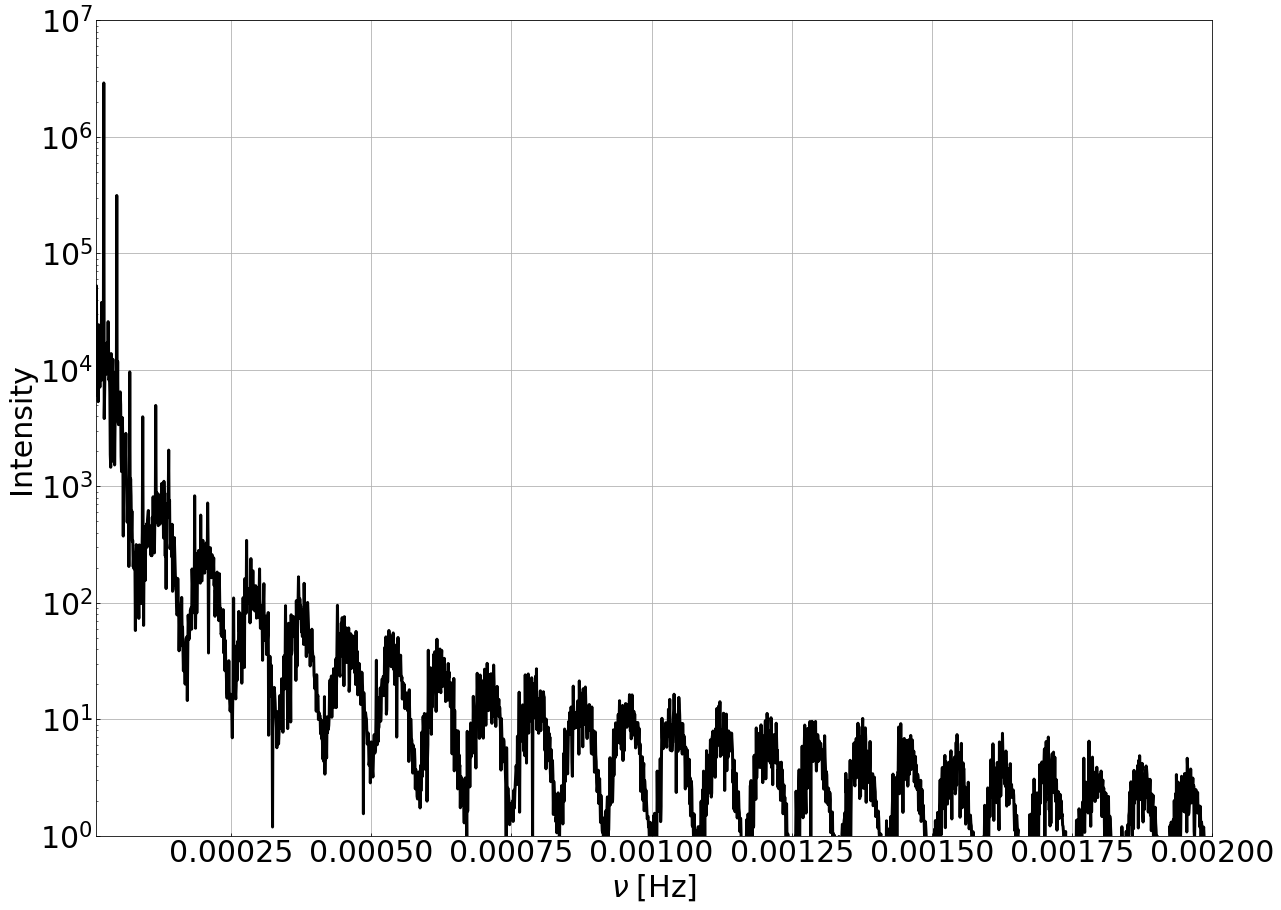

In [92]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for i in range(data_count):
    cut_off = np.argmax(frequencies[i])
#     ax1.plot(frequencies[i][:cut_off],
#              pd.Series(fft_trafo[i]).rolling(window=smoothing_window).mean()[:cut_off],
#              lw=lw)
# ax1.plot(frequencies[i][:cut_off],
#          (np.sum(np.array([pd.Series(fft_trafo[i]).rolling(window=smoothing_window).mean()
#                            for i in range(3)]), axis=0) / 3.)[:cut_off],
#          color='k',
#          lw=lw)
ax1.plot(frequencies[i][:cut_off],
         average_fft[:cut_off],
         color='k',
         lw=lw)
ax1.set_xlim(1e-5, 2e-3)
ax1.set_ylim(1e0, 1e7)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\nu\;[$Hz$]$', fontsize=fontsize)
ax1.set_ylabel(r'Intensity', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.grid(True)
# h, l = ax1.get_legend_handles_labels()
# lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.1),
#                   ncol=2, fontsize=fontsize, handlelength=h_length,
#                   fancybox=True, frameon=False)
# lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.1),
#                   ncol=2, fontsize=fontsize, handlelength=h_length,
#                   fancybox=True, frameon=False)
# ax1.add_artist(lgd1)
plt.show()

In [ ]:
figure.savefig(PICS + "FFT.png",
               bbox_inches='tight')